In [1]:
import os
import itertools 
from os.path import join
from pdb import set_trace
import numpy as np
import pandas as pd
import mne
import deepbci as dbci
from deepbci.utils import utils
from deepbci.data_utils.data import run_group_mutators
import vis_utils as vtils
import matplotlib.pyplot as plt
import pacmap
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.markers as mmark
import matplotlib.lines as mlines
import yfinance as yf
import streamlit as st
import pickle

In [16]:

#Loading data from teh repository
def open_data():
    
    data_cfg_name = 'data-load-Copy1.yaml'
    data_cfg_path = utils.path_to(os.getcwd(), data_cfg_name)
    data_cfg = utils.load_yaml(data_cfg_path)
    vtils.clean_config(data_cfg, keep_keys=['groups', 'mutate'])
    mne.set_log_level('ERROR')
    grps = vtils.instantiate_and_mutate(data_cfg)
    sub_list = grps.get_array()
    np.unique(sub_list[0].labels)
    sig_labels = []
    sub_data = []
    sub_labels = []
    l = []
    for d in sub_list:
        d_data = d.data.get_data()
        d_label = d.labels      
        sub_data.append(d.data.get_data())
        l = list(d.tags['subject'])
        labels = np.full((len(d_data),1), l )
        sub_labels.append(labels)
        sig_labels.append(d.labels)   
    sub_data = np.vstack(sub_data)
    sub_labels = np.vstack(sub_labels)
    sig_labels = np.hstack(sig_labels).reshape(-1,1)
    return sub_data, sub_labels, sig_labels


In [28]:
#loads pickled data that I got from the repositroy
def loadData (file):
    if file == "t-SNE_2D.pickle":
        with open(r"t-SNE_2D.pickle", "rb") as input_file:
            e = pickle.load(input_file)
    if file == "t-SNE_3D.pickle":
        with open(r"t-SNE_3D.pickle", "rb") as input_file:
            e = pickle.load(input_file)
    if file == "PAC_2D.pickle":
        with open(r"PAC_2D.pickle", "rb") as input_file:
            e = pickle.load(input_file) 
    if file == "PAC_3D.pickle":
        with open(r"PAC_3D.pickle", "rb") as input_file:
            e = pickle.load(input_file)  

[[ -9.862234   -0.8902503]
 [ -5.53813     9.428341 ]
 [  7.986785   18.808062 ]
 ...
 [ 22.523441  -27.94753  ]
 [  5.050477  -28.315567 ]
 [ 15.289714  -28.7266   ]]
[1555 1558 1561 1567 1568 1572 1575 1577 1578 1582 1586 1587 1595 1604
 1609 1611 1619 1623 1636 1637 1641 1645 1663 1669 1676 1679 1685 1687
 1689 1690 1693 1694 1695 1697 1705 1710 1711 1713 1721 1726 1735 1737
 1738 1739 1744 1747 1751 1760 1764 1775 1794 1795 1800 1805 1818 1828
 1831 1833 1842 1843 1847 1856 1865 1871 1892 1899 1905 1912 1917 1919
 1922 1923 1926 1929 1931 1932 1939 1948 1950 1951 1954 1958 1959 1969
 1970 1978 1981 2002 2005 2010 2014 2018 2020 2027 2036 2044 2051 2053
 2057 2064 2067 2070 1032 1033 1034 1037 1042 1048 1059 1062 1074 1077
 1084 1085 1086 1089 1104 1126 1137 1138 1149 1150 1156 1164 1167 1168
 1172 1174 1177 1181 1183 1188 1195 1200 1201 1205 1210 1214 1217 1227
 1229 1230 1232 1234 1238 1240 1242 1244 1250 1256 1263 1264 1270 1273
 1278 1303 1306 1309 1310 1316 1318 1321 1332 1333 

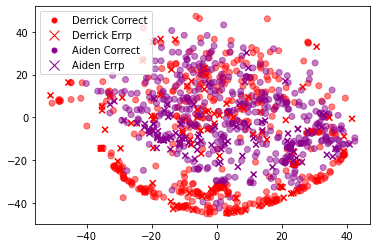

In [31]:
#makes graph of me and aiden in 2d with t-SNE
def d_a_2DGraph():
#     sub_data, sub_labels, sig_labels = open_data()
    with open(r"sub_data.pickle", "rb") as input_file:
        sub_data = pickle.load(input_file)
    with open(r"sub_labels.pickle", "rb") as input_file:
        sub_labels = pickle.load(input_file)
    with open(r"sig_labels.pickle", "rb") as input_file:
        sig_labels = pickle.load(input_file)
    with open(r"t-SNE_2D.pickle", "rb") as input_file:
        reduced1_2D = pickle.load(input_file)
    print(reduced1_2D)
    derrick_loc1 = np.where((sub_labels == 10) & (sig_labels == 1))[0]
    derrick_loc2 = np.where((sub_labels == 10) & (sig_labels == 2))[0]
    aiden_loc1 = np.where((sub_labels == 11) & (sig_labels == 1))[0]
    aiden_loc2 = np.where((sub_labels == 11) & (sig_labels == 2))[0]
    d_a_loc1 = np.concatenate([aiden_loc1, derrick_loc1], axis=0)
    d_a_loc2 = np.concatenate([aiden_loc2, derrick_loc2], axis=0)
    print(d_a_loc1)
    d_a_reduced1 = reduced1_2D[d_a_loc1]
    d_a_reduced2 = reduced1_2D[d_a_loc2]
    d_a_labels_1 = sub_labels[d_a_loc1]
    d_a_labels_2 = sub_labels[d_a_loc2]
    d_a_labels_1_color = []
    d_a_labels_2_color = []
    for i in d_a_labels_1:
        if i[0] == 11:
            d_a_labels_1_color.append('r')
        if i[0] == 10:
            d_a_labels_1_color.append('darkmagenta')
    for i in d_a_labels_2:
        if i[0] == 11:
            d_a_labels_2_color.append('r')
        if i[0] == 10:
            d_a_labels_2_color.append('darkmagenta')
    fig = plt.figure()
    plt.scatter(d_a_reduced2[:,0],d_a_reduced2[:,1],c=d_a_labels_2_color, alpha=.5)
    plt.scatter(d_a_reduced1[:,0],d_a_reduced1[:,1],c=d_a_labels_1_color, marker='x')
# Red X: Errp in Subject 11
# Red O: Correct action Subject 11
# Purple X: Errp in Subject 10
# Purple O: Correct action Subject 10
    red_circle = mlines.Line2D([], [], color='r', marker='.', linestyle='None',
                          markersize=10, label='Derrick Correct')
    red_x = mlines.Line2D([], [], color='r', marker='x', linestyle='None',
                          markersize=10, label='Derrick Errp')
    purple_circle = mlines.Line2D([], [], color='darkmagenta', marker='.', linestyle='None',
                          markersize=10, label='Aiden Correct')
    purple_x = mlines.Line2D([], [], color='darkmagenta', marker='x', linestyle='None',
                          markersize=10, label='Aiden Errp')
    plt.legend(handles=[red_circle, red_x, purple_circle, purple_x])
    
d_a_2DGraph()

In [21]:
#how I made the pickled data
with open(r"sub_data.pickle", "wb") as output_file:
    pickle.dump(sub_data, output_file)

In [22]:

with open(r"sub_labels.pickle", "wb") as output_file:
    pickle.dump(sub_labels, output_file)

In [23]:
with open(r"sig_labels.pickle", "wb") as output_file:
    pickle.dump(sig_labels, output_file)

In [4]:
#reduction method
def reduce_data(components):
    sub_data, sub_labels, sig_labels = open_data()
    flatArray = sub_data.reshape(len(sub_data), -1)
    reduced_data = TSNE(perplexity=30, n_components=components, init='pca').fit_transform(flatArray)
    print(reduced_data.shape)
    return reduced_data
# reduced1_2D = reduce_data(sub_data, 2)
# reduced1_3D = reduce_data(sub_data, 3)

In [14]:
#Usinng pickle to make files of the reduced data so website doesn't run slow
reduced_tsne_3D = reduce_data(3)
with open(r"t-SNE_3D.pickle", "wb") as output_file:
    pickle.dump(reduced_tsne_3D, output_file)

/home/dev/miniconda/envs/mlenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/dev/miniconda/envs/mlenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(21870, 3)


In [11]:
with open(r"t-SNE_2D.pickle", "rb") as input_file:
    e = pickle.load(input_file)
print(e)

[[ -9.862234   -0.8902503]
 [ -5.53813     9.428341 ]
 [  7.986785   18.808062 ]
 ...
 [ 22.523441  -27.94753  ]
 [  5.050477  -28.315567 ]
 [ 15.289714  -28.7266   ]]


In [12]:
#Graph showing both me and aidens data in 2D
def d_a_2DGraph():
    sub_data, sub_labels, sig_labels = open_data()
    reduced1_2D = e
    derrick_loc1 = np.where((sub_labels == 10) & (sig_labels == 1))[0]
    derrick_loc2 = np.where((sub_labels == 10) & (sig_labels == 2))[0]
    aiden_loc1 = np.where((sub_labels == 11) & (sig_labels == 1))[0]
    aiden_loc2 = np.where((sub_labels == 11) & (sig_labels == 2))[0]
    d_a_loc1 = np.concatenate([aiden_loc1, derrick_loc1], axis=0)
    d_a_loc2 = np.concatenate([aiden_loc2, derrick_loc2], axis=0)
    d_a_reduced1 = reduced1_2D[d_a_loc1]
    d_a_reduced2 = reduced1_2D[d_a_loc2]
    d_a_labels_1 = sub_labels[d_a_loc1]
    d_a_labels_2 = sub_labels[d_a_loc2]
    d_a_labels_1_color = []
    d_a_labels_2_color = []
    for i in d_a_labels_1:
        if i[0] == 11:
            d_a_labels_1_color.append('r')
        if i[0] == 10:
            d_a_labels_1_color.append('darkmagenta')
    for i in d_a_labels_2:
        if i[0] == 11:
            d_a_labels_2_color.append('r')
        if i[0] == 10:
            d_a_labels_2_color.append('darkmagenta')
    plt.scatter(d_a_reduced2[:,0],d_a_reduced2[:,1],c=d_a_labels_2_color, alpha=.5)
    plt.scatter(d_a_reduced1[:,0],d_a_reduced1[:,1],c=d_a_labels_1_color, marker='x')
# Red X: Errp in Subject 11
# Red O: Correct action Subject 11
# Purple X: Errp in Subject 10
# Purple O: Correct action Subject 10
    red_circle = mlines.Line2D([], [], color='r', marker='.', linestyle='None',
                          markersize=10, label='Derrick Correct')
    red_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=10, label='Derrick Errp')
    purple_circle = mlines.Line2D([], [], color='darkmagenta', marker='.', linestyle='None',
                          markersize=10, label='Aiden Correct')
    purple_x = mlines.Line2D([], [], color='darkmagenta', marker='x', linestyle='None',
                          markersize=10, label='Aiden Errp')
    plt.legend(handles=[red_circle, red_x, purple_circle, purple_x])
    plt.show()
    

In [11]:
#3D graph of me and aiden 
#technique using all data to train t-sne model includes all subjects and sig_labels that are then seperated here by grabbing
#the data based on its position that we can gather from the original data and then graphs it
def d_a_3DGraph():
    sub_data, sub_labels, sig_labels = open_data()
    reduced1_3D = reduce_data(3)
    %matplotlib widget
    derrick_loc1 = np.where((sub_labels == 10) & (sig_labels == 1))[0]
    derrick_loc2 = np.where((sub_labels == 10) & (sig_labels == 2))[0]
    aiden_loc1 = np.where((sub_labels == 11) & (sig_labels == 1))[0]
    aiden_loc2 = np.where((sub_labels == 11) & (sig_labels == 2))[0]
    d_a_loc1 = np.concatenate([aiden_loc1, derrick_loc1], axis=0)
    d_a_loc2 = np.concatenate([aiden_loc2, derrick_loc2], axis=0)
    d_a_reduced1 = reduced1_3D[d_a_loc1]
    d_a_reduced2 = reduced1_3D[d_a_loc2]
    d_a_labels_1 = sub_labels[d_a_loc1]
    d_a_labels_2 = sub_labels[d_a_loc2]
    d_a_labels_1_color = []
    d_a_labels_2_color = []
    for i in d_a_labels_1:
        if i[0] == 11:
            d_a_labels_1_color.append('r')
        if i[0] == 10:
            d_a_labels_1_color.append('darkmagenta')
    for i in d_a_labels_2:
        if i[0] == 11:
            d_a_labels_2_color.append('r')
        if i[0] == 10:
            d_a_labels_2_color.append('darkmagenta')
#     fig = plt.figure()
#     fig.set_size_inches(18.5, 10.5)
#     ax = plt.axes(projection='3d')
#     ax.scatter(d_a_reduced1[:,0],d_a_reduced1[:,1],d_a_reduced1[:,2], c=d_a_labels_1_color, marker='.')
#     ax.scatter(d_a_reduced2[:,0],d_a_reduced2[:,1],d_a_reduced2[:,2], c=d_a_labels_2_color, marker='x')
# Red X: Errp in Subject 11
# Red O: Correct action Subject 11
# Purple X: Errp in Subject 10
# Purple O: Correct action Subject 10
#     red_circle = mlines.Line2D([], [], color='r', marker='.', linestyle='None',
#                           markersize=10, label='Derrick Correct')
#     red_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
#                           markersize=10, label='Derrick Errp')
#     purple_circle = mlines.Line2D([], [], color='darkmagenta', marker='.', linestyle='None',
#                           markersize=10, label='Aiden Correct')
#     purple_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
#                           markersize=10, label='Aiden Errp')
#     ax.legend(handles=[red_circle, red_x, purple_circle, purple_x])
    
    fig1 = px.scatter_3d(x=d_a_reduced1[:,0],y=d_a_reduced1[:,1],z=d_a_reduced1[:,2],color=d_a_labels_1_color)
    for i, d in enumerate(fig1.data):
        fig1.data[i].marker.symbol = "diamond-open"
    fig2 = px.scatter_3d(x=d_a_reduced2[:,0],y=d_a_reduced2[:,1],z=d_a_reduced2[:,2], color=d_a_labels_2_color)
    for i, d in enumerate(fig2.data):
        fig2.data[i].marker.symbol = "circle-open"
    fig = go.Figure(data = fig1.data + fig2.data)
    fig.show()

In [15]:
#PacMap Reduction 
def Pac_reduction_2D():
    sub_data, sub_labels, sig_labels = open_data()
    flatArray = sub_data.reshape(len(sub_data), -1)
    x_embedded = pacmap.PaCMAP(n_components=2,n_neighbors=None, MN_ratio=.5, FP_ratio=2.0)
    x_fit_2D = x_embedded.fit_transform(flatArray,init='pca')
    return x_fit_2D
# x_fit_2D = Pac_reduction_2D()

In [16]:
def Pac_reduction_3D():
    sub_data, sub_labels, sig_labels = open_data()
    sig_labels = np.hstack(sig_labels).reshape(-1,1)
    flatArray = sub_data.reshape(len(sub_data), -1)
    x_embedded = pacmap.PaCMAP(n_components=3,n_neighbors=None, MN_ratio=.5, FP_ratio=2.0)
    x_fit_3D = x_embedded.fit_transform(flatArray,init='pca')
    return x_fit_3D
# x_fit_3D = Pac_reduction_3D()

In [17]:
#pacmap pickeld data
PAC_2D = Pac_reduction_2D()
with open(r"PAC_2D.pickle", "wb") as output_file:
    pickle.dump(PAC_2D, output_file)

In [18]:
PAC_3D = Pac_reduction_3D()
with open(r"PAC_3D.pickle", "wb") as output_file:
    pickle.dump(PAC_3D, output_file)

In [8]:
#Allowes you to grab any subjects data and graph it 2D with pacmap
def Pac_a_d_2D():
    sub_data, sub_labels, sig_labels = open_data()
    x_fit_2D = Pac_reduction_2D()
    derrick_loc1 = np.where((sub_labels == 10) & (sig_labels == 1))[0]
    derrick_loc2 = np.where((sub_labels == 10) & (sig_labels == 2))[0]
    aiden_loc1 = np.where((sub_labels == 11) & (sig_labels == 1))[0]
    aiden_loc2 = np.where((sub_labels == 11) & (sig_labels == 2))[0]
    d_a_loc1 = np.concatenate([aiden_loc1, derrick_loc1], axis=0)
    d_a_loc2 = np.concatenate([aiden_loc2, derrick_loc2], axis=0)
    d_a_reduced1 =x_fit_2D[d_a_loc1]
    d_a_reduced2 = x_fit_2D[d_a_loc2]
    d_a_labels_1 = sub_labels[d_a_loc1]
    d_a_labels_2 = sub_labels[d_a_loc2]
    d_a_labels_1_color = []
    d_a_labels_2_color = []
    for i in d_a_labels_1:
        if i[0] == 11:
            d_a_labels_1_color.append('r')
        if i[0] == 10:
            d_a_labels_1_color.append('darkmagenta')
    for i in d_a_labels_2:
        if i[0] == 11:
            d_a_labels_2_color.append('r')
        if i[0] == 10:
            d_a_labels_2_color.append('darkmagenta')
    plt.scatter(d_a_reduced2[:,0],d_a_reduced2[:,1],c=d_a_labels_2_color, alpha=.5)
    plt.scatter(d_a_reduced1[:,0],d_a_reduced1[:,1],c=d_a_labels_1_color, marker='x')
# Red X: Errp in Subject 11
# Red O: Correct action Subject 11
# Purple X: Errp in Subject 10
# Purple O: Correct action Subject 10
    red_circle = mlines.Line2D([], [], color='r', marker='.', linestyle='None',
                          markersize=10, label='Derrick Correct')
    red_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=10, label='Derrick Errp')
    purple_circle = mlines.Line2D([], [], color='darkmagenta', marker='.', linestyle='None',
                          markersize=10, label='Aiden Correct')
    purple_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=10, label='Aiden Errp')
    plt.legend(handles=[red_circle, red_x, purple_circle, purple_x])
    plt.show()
# Pac_a_d_2D()

In [9]:
#Allowes you to grab any subject with pacmap in 3D
def Pac_a_d_3D():
    sub_data, sub_labels, sig_labels = open_data()
    x_fit_3D = Pac_reduction_3D()
    %matplotlib widget
    derrick_loc1 = np.where((sub_labels == 10) & (sig_labels == 1))[0]
    derrick_loc2 = np.where((sub_labels == 10) & (sig_labels == 2))[0]
    aiden_loc1 = np.where((sub_labels == 11) & (sig_labels == 1))[0]
    aiden_loc2 = np.where((sub_labels == 11) & (sig_labels == 2))[0]
    d_a_loc1 = np.concatenate([aiden_loc1, derrick_loc1], axis=0)
    d_a_loc2 = np.concatenate([aiden_loc2, derrick_loc2], axis=0)
    d_a_reduced1 =x_fit_3D[d_a_loc1]
    d_a_reduced2 = x_fit_3D[d_a_loc2]
    d_a_labels_1 = sub_labels[d_a_loc1]
    d_a_labels_2 = sub_labels[d_a_loc2]
    d_a_labels_1_color = []
    d_a_labels_2_color = []
    for i in d_a_labels_1:
        if i[0] == 11:
            d_a_labels_1_color.append('r')
        if i[0] == 10:
            d_a_labels_1_color.append('darkmagenta')
    for i in d_a_labels_2:
        if i[0] == 11:
            d_a_labels_2_color.append('r')
        if i[0] == 10:
            d_a_labels_2_color.append('darkmagenta')
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = plt.axes(projection='3d')
    ax.scatter(d_a_reduced1[:,0],d_a_reduced1[:,1],d_a_reduced1[:,2], c=d_a_labels_1_color, marker='.')
    ax.scatter(d_a_reduced2[:,0],d_a_reduced2[:,1],d_a_reduced2[:,2], c=d_a_labels_2_color, marker='x')
# Red X: Errp in Subject 11
# Red O: Correct action Subject 11
# Purple X: Errp in Subject 10
# Purple O: Correct action Subject 10
    red_circle = mlines.Line2D([], [], color='r', marker='.', linestyle='None',
                          markersize=10, label='Derrick Correct')
    red_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=10, label='Derrick Errp')
    purple_circle = mlines.Line2D([], [], color='darkmagenta', marker='.', linestyle='None',
                          markersize=10, label='Aiden Correct')
    purple_x = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=10, label='Aiden Errp')
    ax.legend(handles=[red_circle, red_x, purple_circle, purple_x])
    plt.show()
# Pac_a_d_3D()

In [10]:
#Streamlit home page being made
def HomePage(): 
    st.write("How Does My Brain Compare to (A)?")
#     data_cfg_name = 'data-load-Copy1.yaml'
#     data_cfg_path = utils.path_to(os.getcwd(), data_cfg_name)
#     data_cfg = utils.load_yaml(data_cfg_path)
#     vtils.clean_config(data_cfg, keep_keys=['groups', 'mutate'])
#     data_cfg
#     mne.set_log_level('ERROR')
#     grps = vtils.instantiate_and_mutate(data_cfg)
#     sub_list = grps.get_array()
#     np.unique(sub_list[0].labels)
#     sig_labels = []
#     sub_data = []
#     sub_labels = []
#     l = []
#     for d in sub_list:
#         d_data = d.data.get_data()
#         d_label = d.labels      
#         sub_data.append(d.data.get_data())
#         l = list(d.tags['subject'])
#         labels = np.full((len(d_data),1), l )
#         sub_labels.append(labels)
#         sig_labels.append(d.labels)   
#     sub_data = np.vstack(sub_data)
#     sub_labels = np.vstack(sub_labels)
#     sig_labels = np.hstack(sig_labels).reshape(-1,1)

In [11]:
#stream lit home page for graphs
def main():
    page = st.sidebar.selectbox(
        "Select a Page",
        [
            "Homepage",
            "2D Comparison with t-SNE",
            "3D Comparison with t-SNE",
            "2D Comparison with PaCMAP",
            "3D Comparison with PaCMAP",
            "My 2D Graphs Comapred to others",
            "Aidens 2D Graph Compared to others"
        ]
    )
    if page == "Homepage":
        HomePage()
    if page == "2D Comparison with t-SNE":
        d_a_2DGraph()
    if page == "3D Comparison with t-SNE":  
        d_a_3DGraph()
    if page == "2D Comparison with PaCMAP":
        Pac_a_d_2D()
    if page == "3D Comparison with PaCMAP":
        Pac_a_d_3D()